In [54]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

In [73]:
from tensorflow.keras import layers,models,optimizers,preprocessing

In [61]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [55]:
del sys.modules['os']

In [56]:
import os

In [58]:
os.chdir("C:\\D Drive\\Data Science Ayush\\Brain Tumor\\Training")

In [38]:
os.getcwd()

'C:\\D Drive\\Data Science Ayush'

In [59]:
os.listdir()

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [74]:
main_dir = "C:\\D Drive\\Data Science Ayush\\Brain Tumor"
classification_dirs = [("no_tumor",), ("meningioma_tumor",)]
resolution = 64

def load_images(root_dir_name):
    x = []
    y = []
    
    for label, sub_dir_names in enumerate(classification_dirs):
        for sub_dir_name in sub_dir_names:
            print(f"loading {root_dir_name} {sub_dir_name}")
            sub_dir_path = os.path.join(main_dir, root_dir_name, sub_dir_name)
            for image_name in os.listdir(sub_dir_path):
                image_path = os.path.join(sub_dir_path, image_name)
                image = preprocessing.image.load_img(image_path, color_mode="grayscale", target_size=(resolution, resolution))
                x.append(preprocessing.image.img_to_array(image))
                y.append(label)
    
    x = np.array(x) / 255.0
    y = np.array(y)
    return x, y
    return x, y

In [75]:
x_train, y_train = load_images("Training")
x_test, y_test = load_images("Testing")


loading Training no_tumor
loading Training meningioma_tumor
loading Testing no_tumor
loading Testing meningioma_tumor


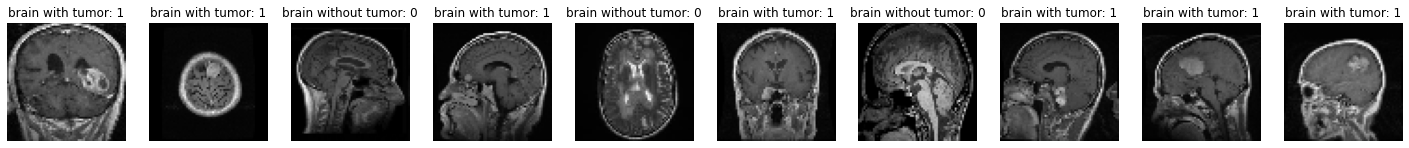

In [77]:
c = 10

fig, subplots = plt.subplots(1, c)
fig.set_size_inches(25, 3)
for i in range(c):
    n = np.random.randint(0, len(x_train))
    num = y_train[n]
    word = "out" if num == 0 else "" 
    
    subplots[i].imshow(x_train[n].reshape((resolution, resolution)), cmap="gray")
    subplots[i].set_title(f"brain with{word} tumor: {num}")
    subplots[i].axis("off")
plt.show()
        

In [78]:
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers,preprocessing
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout

In [79]:
input_shape = (64,64,1)
model = models.Sequential()
model.add(Conv2D(32,kernel_size = (2,2),strides = (1,1),activation = 'linear',input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'linear'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(128,kernel_size = (2,2),strides = (1,1),activation = 'linear'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(256,kernel_size = (2,2),strides = (1,1),activation = 'linear'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(512,kernel_size = (2,2),strides = (1,1),activation = 'linear'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation="linear"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 63, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 256)         1

In [81]:
model.compile(optimizer = 'adam',loss = "binary_crossentropy",metrics = ['accuracy'])

In [82]:
model.fit(x_train,y_train,batch_size = 5,epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
244/244 [==============================] - 4s 18ms/step - loss: 0.5848 - accuracy: 0.7256 - val_loss: 0.7089 - val_accuracy: 0.5591
Epoch 2/20
244/244 [==============================] - 4s 17ms/step - loss: 0.3905 - accuracy: 0.8357 - val_loss: 0.7740 - val_accuracy: 0.6273
Epoch 3/20
244/244 [==============================] - 4s 18ms/step - loss: 0.2830 - accuracy: 0.8866 - val_loss: 0.3949 - val_accuracy: 0.8182
Epoch 4/20
244/244 [==============================] - 4s 17ms/step - loss: 0.1819 - accuracy: 0.9359 - val_loss: 0.1802 - val_accuracy: 0.9682
Epoch 5/20
244/244 [==============================] - 4s 17ms/step - loss: 0.1373 - accuracy: 0.9532 - val_loss: 0.1663 - val_accuracy: 0.9318
Epoch 6/20
244/244 [==============================] - 4s 18ms/step - loss: 0.1103 - accuracy: 0.9614 - val_loss: 0.2261 - val_accuracy: 0.9136
Epoch 7/20
244/244 [==============================] - 4s 18ms/step - loss: 0.0659 - accuracy: 0.9803 - val_loss: 0.0507 - val_accuracy: 0.9818

In [83]:
y_pred = model.predict([x_test])

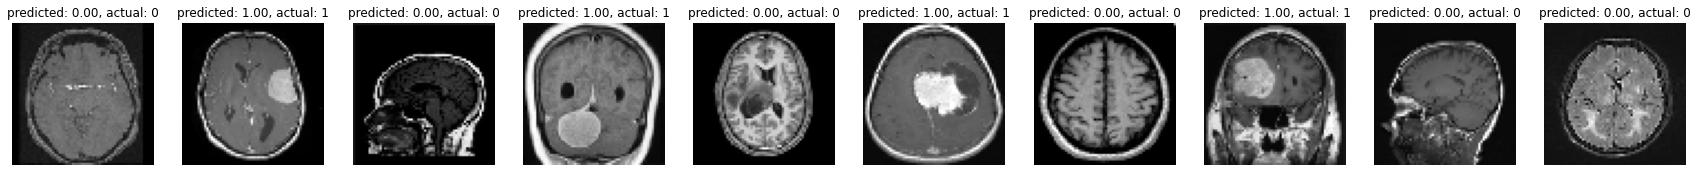

In [86]:

c = 10
fig, subplots = plt.subplots(1, c)
fig.set_size_inches(30, 9)
for i in range(c):
    n = np.random.randint(0, len(x_test))
    guess = str(round(y_pred[n][0], 2)).ljust(4, "0")
    actual = y_test[n]

    subplot = subplots[i]
    subplot.imshow(x_test[n].reshape((resolution, resolution)), cmap="gray")
    subplot.set_title(f"predicted: {guess}, actual: {actual}")
    subplot.axis("off")
plt.show()


In [93]:
model.save("C:\\D Drive\\Data Science Ayush")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\D Drive\Data Science Ayush\assets
